### Álgebra Lineal con NumPy y SciPY

Facultad de Ingeniería - Universidad de la República - Uruguay

25 de agosto de 2025

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gmonce/all_of_machine_learning/blob/main/AlgebraLineal-Intro.ipynb)

En este notebook presentaremos una breve introducción al álgebra lineal, la rama de las matemáticas que estudia las ecuaciones y transformaciones lineales, y su representación en espacios vectoriales y a través de matrices. Intentaremos ver las principales propiedades de las matrices, la intuición detrás de algunas de ellas, y mostrar cómo manipularlas utiliando las bibliotecas de Python `numpy` y `scipy` (véase [la diferencia entre ambas bibliotecas](http://www.scipy.org/scipylib/faq.html#what-is-the-difference-between-numpy-and-scipy)).


**Prerrequisitos**

- Suponemos que el lector tiene ya instalado un entorno de programación en Python
- Suponemos que el lector conoce el lenguaje de programación Python y tiene alguna experiencia en programación.
- Suponemos que el lector conoce la biblioteca NumPy.


**Referencias**: 

[Linear Algebra Review and Reference](http://cs229.stanford.edu/section/cs229-linalg.pdf) (Zico Kolter)

[CS229 Notes - 1](http://cs229.stanford.edu/notes/cs229-notes1.pdf) (Andrew Ng)

In [1]:
# Importamos NumPy y SciPy
import numpy as np
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
# Estilo clásico para gráficos
plt.style.use('seaborn-v0_8-paper')


## 1. Operaciones (muy) básicas

Vamos primero a crear algunos arrays de `numpy`, la estructura más común para manejar matrices n-dimensionales. Vamos a trabajar principalmente con arrays bidimensionales (a.k.a. matrices), porque son más fáciles de interpretar,  pero la mayoría de las operaciones y resultados admiten como argumentos matrices n-dimensionales (también llamados _tensores_).

Creemos primero una matriz de NumPy de 4 filas y 3 columnas y mostremos que sus elementos son enteros.  Diremos que esto es una matriz de dimensiones $4 \times 3$ y que pertenece a $\mathbb{R}^{4 \times 3}$ (la convención es considerar primero las filas y luego las columnas), y solemos denotarla como $A(4,3)$ . Mostremos luego la suma de sus elementos, la suma columna a columna, y fila a fila (por una descripción de cómo maneja `numpy` estas operaciones, puede ver el la [Introducción a NumPy](https://github.com/pln-fing-udelar/cursos/blob/master/tutoriales/NumPy-Intro.ipynb). 

In [2]:
# Especificamos los elementos de la matriz como listas de Python 
A=np.array([[0,0,1],[1,1,0],[1,1,1],[2,2,2]])
print (A)
print (A.dtype)

print (np.sum(A))
print (np.sum(A,axis=0))
print (np.sum(A,axis=1))

[[0 0 1]
 [1 1 0]
 [1 1 1]
 [2 2 2]]
int32
12
[4 4 4]
[1 2 3 6]


También podemos crear una matriz de 3 filas y 4 columnas, a la que podemos completar con ceros, o con unos. 


In [3]:
print (np.zeros((3,4)))


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [4]:
print (np.ones((3,4)))

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


Los 1D-arrays en NumPy son siempre vectores files, i.e. **los vectores son simplemente matrices $1\times n$**:

In [5]:
print (np.ones(10))
print ("Size:"+ str(np.ones(10).size))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Size:10


Una operación muy importante es el _producto interno_ de dos vectores, una operación que nos devuelve un número, y que puede verse como una medida de similitud entre ambos. Dados dos vectores $v = (v_1,v_2,\ldots,v_n)$ y $2 = (w_1,w_2,\ldots,w_n)$ de iguales dimensiones, definimos su producto interno $v\cdot w$ como $\sum_{i=1}^{n} v_i w_i$

In [6]:
v= np.array([1,2,3])
w= np.array([4,5,5])
print (np.dot(v,w))

29


Las matrices pueden sumarse (ambas matrices deben tener las mismas dimensiones):

In [7]:
A=np.array([0,1,1,0,0,1,1,1,1]).reshape((3,3))
B=np.array([1,1,1,1,0,1,0,1,1]).reshape((3,3))
print (str(A + B))


[[1 2 2]
 [1 0 2]
 [1 2 2]]


Si las matrices tienen diferentes dimensiones NumPy hace un _upcasts_ y agrega elementos para hacer que las matrices sean compatibles (si ello es posible). En el siguiente ejemplo, la única matriz en $b$ se repite para hacer de $b$ una matriz $2 \times 2$ y poder sumarla a $A$. Este mecanismo de NumPy se llama [broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html).

In [8]:
A=np.array([0,1,2,1]).reshape((2,2))
B=np.array([0,1])

print (A)
print (B)
print (A + B)

[[0 1]
 [2 1]]
[0 1]
[[0 2]
 [2 2]]


Podemos multiplicar un escalar por una matriz...

In [9]:
a=8.1
B=np.ones((2,3))
print (a*B)

[[8.1 8.1 8.1]
 [8.1 8.1 8.1]]


**Producto de matrices**.  Dada una matriz $A(n,p)$ y $B(p,m)$, $A.B=C$, donde $C=((c_{ij}))$ y $c_{ij}=\Sigma_{h=1}^p a_{ih}b_{hj}$

In [10]:
A=np.array([1,2,1,0,1,1,0,1,1,0,0,0]).reshape(4,3)
print (A)
B=np.array([[2,1],[1,1],[0,0]])
print (B)

[[1 2 1]
 [0 1 1]
 [0 1 1]
 [0 0 0]]
[[2 1]
 [1 1]
 [0 0]]


In [11]:
print (A @ B )

[[4 3]
 [1 1]
 [1 1]
 [0 0]]


A veces es más fácil ver el producto de matrices como una matriz donde cada fila del producto es el _dot product_ de la fila correspondiente de $A$ ($A_i$) y $B$. NumPy nos permite 'recortar' columnas y filas:

In [12]:
print ("Shape de A:"+ str(A.shape))
for i in range(A.shape[0]):
    print (A[i]@ B)

Shape de A:(4, 3)
[4 3]
[1 1]
[1 1]
[0 0]


Alternativamente, podemos ver el producto de matrices como una matriz donde cada columna es el producto de A y la correspondiente columna en B ($B^j$)

In [13]:
for j in range(B.shape[1]):
    print (A@B[:,j])

[4 1 1 0]
[3 1 1 0]


Observe que los resultados son arrays fila, y no (como tal vez se podría esperar) arrays columna. La razón es simple: los arrays 1D en NumPy son siempre los mismos, no importa si son filas o columnas. Si lo que efectivamente queremos es un vector columna, podemos utilizar `v.reshape(rows,1)`

In [14]:
print ((A@B[:,j]).reshape(4,1))

[[3]
 [1]
 [1]
 [0]]


La trasposición de matrices transforma filas en columnas, y viceversa

In [15]:
print (A)
print (np.transpose(A))

[[1 2 1]
 [0 1 1]
 [0 1 1]
 [0 0 0]]
[[1 0 0 0]
 [2 1 1 0]
 [1 1 1 0]]


Una propiedad interesante es la siguiente (no es difícil de probar):


$(A\cdot B)^t = B^t \cdot A^t$ **[1]**


In [16]:
print (np.transpose(A.dot(B)))
print (np.transpose(B).dot(np.transpose(A)))

[[4 1 1 0]
 [3 1 1 0]]
[[4 1 1 0]
 [3 1 1 0]]


## 2. Matrices como transformaciones lineales

From [Wikipedia](http://en.wikipedia.org/wiki/Matrix_%28mathematics%29): 


*Una aplicación importante de las matrices es representar transformaciones lineales, es decir, generalizaciones de funciones lineales como $f(x) = 4x$. Por ejemplo, la rotación de vectores en espacios de tres dimensiones es una transformación lineal que puede ser representada por una matriz de rotación 
$R$. Si $v$ es un vector columna que describe la posición de un punto en el espacio, el producto $Rv$ es el vector columna que describe la posición del punto después de la rotación **El proeducto de dos matrices es una matriz que representa la composición de dos transformaciones lineales**

La siguiente imagen muestra cómo el cuadrado unitario se transforma bajo una transformación lineal, representada por una matriz 2 por 2. Este uso de las matrices nos permitirá imaginar mejor las propiedades abstractas que describiremos. 



In [17]:
from IPython.display import Image
Image(url='http://upload.wikimedia.org/wikipedia/commons/a/ad/Area_parallellogram_as_determinant.svg',width=250)


Los vectores en las filas de una matriz 2x2 corresponden a las imágenes de un cuadrado unitario, que se transforma en un paralelogramo. Veamos esto en Python. Supongamos que tenemos la matriz [[1,1],[2,1]]. Esta matriz representa una transformación, donde cada punto en  $R^2$ (x,y) se mapea a  (x+2y,x+y). Verifiquémoslo:

In [47]:
Ex=np.array([[1,1],[2,1]])
print ([1,1]@Ex) # [1+2,1+1]

[3 2]


Veamos cómo se transforma el cuadrado unidad bajo la transformación de nuestra matriz. Primero escribamos una función que muestra las transformación del cuadrado unidad bajo cualquier transformación.

In [48]:
def transform_unit_square(A):
    nxp=20
    nxq=20
    p = np.linspace(-1.0,1.0,nxp)
    q = np.linspace(-1.0,1.0,nxq)
    m=np.meshgrid(p,q)        # Create grid for plotting
    xx=m[0]
    yy=m[1]

    # Apply transform to every point in grid.
    for i in range(nxp):
          for j in range(nxq):
            x = np.array([xx[i][j], yy[i][j]])
            y = np.dot(A,x)         
            plt.plot(x[0], x[1], '.b', y[0], y[1], '.r')

    plt.suptitle('Aplicando la transformación y=Ax en una grilla')
    plt.axis('equal')
    plt.show()
    


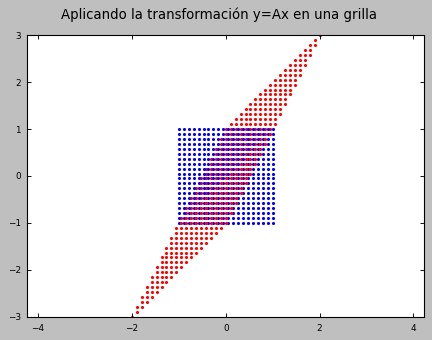

In [49]:
transform_unit_square(Ex)

Veamos cómo una matriz transforma el círculo de radio 1 (observe cómo el origen permanece incambiado).

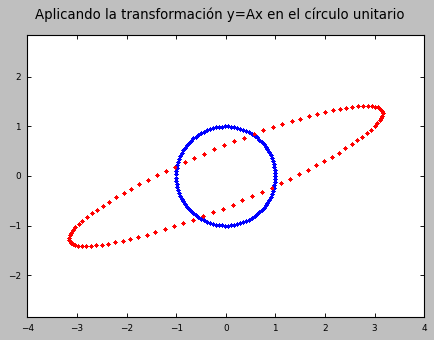

In [86]:
def transform_unit_circle(A):
    nrp=100
    t = np.linspace(0,np.pi*2,nrp)



    p = np.linspace(-1.0,1.0,nrp)
    for i in range(100):
        x=[np.cos(t),np.sin(t)]
        y=np.dot(A,x)
        plt.plot(x[0], x[1], '.b', y[0], y[1], '.r')
    
    plt.suptitle('Aplicando la transformación y=Ax en el círculo unitario')
    plt.axis('equal')
    plt.show()

transform_unit_circle(Ex)


Veamos qué sucede con la matriz  [[1,1],[1,1]]

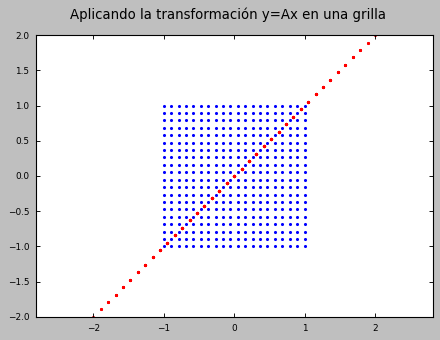

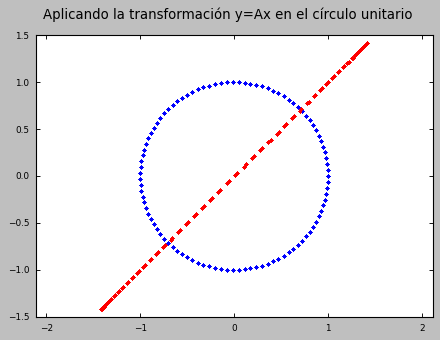

In [87]:
transform_unit_square([[1,1],[1,1]])
transform_unit_circle([[1,1],[1,1]])

## 3. Matriz inversa

In [52]:
import scipy.linalg

Una matriz $(n,n)$ A es _invertible_ si existe una matriz B tal que $A \cdot B = I$, donde $I$ es la matriz identidad. B es la _matriz inversa_ de  $A$. 

**Para transformaciones lineales, la matriz inversa representa la transformación lineal que nos devuelve el plano original.**

In [88]:
A=np.array([1,1,1,0,1,1,1,2,1]).reshape((3,3))
B=sp.linalg.inv(A)
print (B)

[[ 1. -1.  0.]
 [-1.  0.  1.]
 [ 1.  1. -1.]]


In [89]:
print (A@B)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [90]:
print (B@A)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Busquemos la inversa de una matriz, y mostremos cómo cada una de ellas modifica el círculo unitario:

In [91]:
A=np.array([2,-2,-1,3]).reshape((2,2))
Inv=sp.linalg.inv(A)
print(Inv)

[[0.75 0.5 ]
 [0.25 0.5 ]]


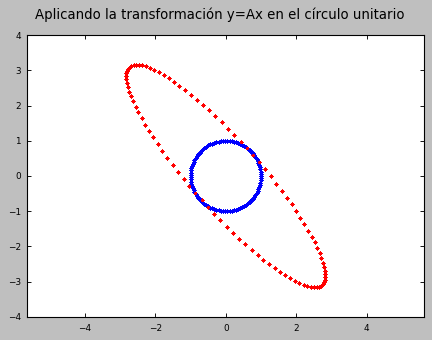

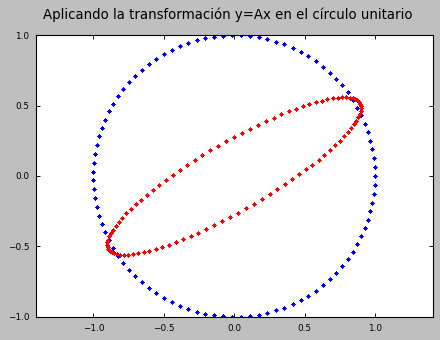

In [92]:
transform_unit_circle(A)

transform_unit_circle(Inv)



## 4. Normas

La _norma_ de un vector $\lVert x \rVert$ es una medida de su "largo". La norma $l_2$ (o norma euclídea) es:

$ \lVert x \rVert _2 = \sqrt{\sum_{i=1}^n{x_i^2}}$

... equivalente a $\sqrt{x^Tx}$.

Otras normas: 

$ \lVert x \rVert _1 = \sum_{i=1}^n{|x_i|}$

$ \lVert x \rVert _\infty = \max_{i}|x_i|$

Vamos a calcularlas utilizando `scipy.linalg.norm`:

In [93]:
v=np.array([1,2,3,5,5])

print(sp.linalg.norm(v,2))
print(sp.linalg.norm(v,1))
print(sp.linalg.norm(v,np.inf))




8.0
16.0
5.0



## 6. Algunas identidades básicas 

In [94]:
A=np.array([1,1,1,0,1,1,1,2,1]).reshape((3,3))
B=np.array([1,0,1,0,1,1,0,1,2]).reshape((3,3))
print (A)
print (B)


[[1 1 1]
 [0 1 1]
 [1 2 1]]
[[1 0 1]
 [0 1 1]
 [0 1 2]]


*Propiedad 1:* Si multiplicamos una matriz por su inversa, obtenemos la matriz identidad (no importa el orden en que lo hagamos)   **[2]**

$A\cdot A^{-1} = A^{-1}\cdot A = I$

In [95]:
print (A@sp.linalg.inv(A))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [96]:
print (sp.linalg.inv(A)@A)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


_Propiedad 2_: $(AB)^{-1} = B^{-1}A^{-1}$ **[3]** Prueba: basta con multiplicar por la izquierda con $AB$ ambos lados y obtener $I$

In [97]:
print (sp.linalg.inv(A@B))
print (sp.linalg.inv(B)@sp.linalg.inv(A))

[[-1. -2.  2.]
 [-3. -1.  3.]
 [ 2.  1. -2.]]
[[-1. -2.  2.]
 [-3. -1.  3.]
 [ 2.  1. -2.]]


_Propiedad 3_: $(A^T)^{-1}= (A^{-1})^T$ **[4]**. _La inversa de la traspuesta es la traspuesta invertida_ 

Prueba: usando la Propiedad 1 y trasponiendo, obtenemos $(AA^{-1})^{T}=I$. Aplicando [1], obtenemos $(A^{-1})^T A^T=I$. Multiplicando ambos lados por la derecha por $(A^T)^{-1}$, obtenemos el resultado que buscamos. 

In [98]:
print (sp.linalg.inv(np.transpose(A)))
print (np.transpose(np.linalg.inv(A)))

[[ 1. -1.  1.]
 [-1.  0.  1.]
 [ 0.  1. -1.]]
[[ 1. -1.  1.]
 [-1.  0.  1.]
 [ 0.  1. -1.]]


### Rango e independencia lineal 

Un conjunto de vectores es _linealmente independiente_ si ninguno de los vectores puede expresarse como una combinación lineal del reso (o, de forma equivalente, si $\sum_{n} \alpha_{n}a_n = 0$ solo si todos los  $\alpha_{n}$ son 0). El _rango_ de una matriz es el máximo número de filas (o, de forma equivalente, el máximo número de columnas) linealmente independientes. El rango mide qué tanta "información" guarda la matriz. Si el número de columnas es mayor al rango, entonces de alguna forma podremos "comprimir" la matriz.  

## 6. Trazas y determinantes

La _traza_ de una matriz se define como la suma de los elementos de su diagonal. 

In [99]:
print (A)
print (np.trace(A))

[[1 1 1]
 [0 1 1]
 [1 2 1]]
3


Propiedad: $Tr(AB)=Tr(BA)$ **[5]**

In [101]:
print (np.trace(A@B),"=",np.trace(B@A))

8 = 8


El _determinante_  $|A|$ de una matriz cuadrada $N\times N$ se define como:

$|A| = \sum (\pm 1)A_{1i_1}A_{2i_2}\ldots A_{Ni_N}$, donde "la suma se toma sobre todos los productos consistentes en precisamente un elemento de cada fila y un elemento de cada columna, con un coeficiente $+1$ or $-1$ de acuerdo a si la permutación $i_1i_2\ldots i_N$ es par o impar, respectivamente".  De Wikipedia: _"Se puede dar una  interpretación geomáetrica al valor del determinante de una matriz cuadrada con valores reales: **el valor absoluto del determinante da el valor de escala por el que el área, el volumen o su análogo de mayor dimensión es multiplicada bajo la transformación lineal asociada, mientras que el signo indica si la transformación preserva la transformación. **. Por lo tanto, una matriz 2x2 con determinante -2, aplicada a una región del plano con área finita, transformará esa región en otra con el doble de área, pero orientada al revés"_



Propiedad: $|AB| = |A||B|$ **[6]** (**El determinante de un producto de matrices es el producto de sus determinantes**)

In [102]:
print (np.linalg.det(A@B))
print (np.linalg.det(A), np.linalg.det(B))

-1.0
-1.0 1.0


Determinante de la matriz inversa: $|A^{-1}| = \frac{1}{|A|}$  **[7]**(**El determinante de la inversa de una matriz es el inverso real de su determinante**). Por lo tanto, si una matriz es invertible su determinante será no negativo. 

In [103]:
C=np.array([2,-2,-1,3]).reshape((2,2))
print (np.linalg.det(np.linalg.inv(C)))
print (np.linalg.det(C))

0.25000000000000006
4.0


## 7. Valores propios (_eigenvalues_)

Su una matriz A tiene tamaño $M \times M$, entonces la ecuación de sus valores propios es $Au_i = \lambda _i u_i$ ($u_i$ es un vector propio, o  _eigenvector_ y $\lambda_i$ es su correspondiente valor propio o  _eigenvalue_). Si tenemos un vector  $v$, y una matriz $A$,el producto $Av$ produce otro vector $v'$. Si $v$ and $v'$  son paralelos, entonces $v$ es un eigenvector de $A$, y el factor de escala entre  $v$ y $v'$ es su valor propio. En la siguiente figura (tomada de la página de Wikipedia sobre vectores y valores propios), se muestra la transformación producida por la matriz [[2,1],[1,2]]; los vectores azules y rosados son eigenvectors:

In [104]:
from IPython.display import Image
Image(url='http://upload.wikimedia.org/wikipedia/commons/a/ad/Eigenvectors-extended.gif')

**La ecuación de valores propios de $A$ es $(A -\lambda I)v =0$**. Esta ecuación tiene una solución no negativa si su determinante $|A - \lambda I|=0$; sus raíces son precisamente los valores propios de A.

Supongamos que tenemos la siguiente matriz A:

In [105]:
A=np.array([2,0,0,0,3,4,0,4,9]).reshape(3,3)
print (A)

[[2 0 0]
 [0 3 4]
 [0 4 9]]


Su rango es el número de valores propios no nulos:

In [106]:
print (np.linalg.matrix_rank(A))

3


Encontremos los valores y vectores propios (note que cualquier múltiplo no negativo de un vector propio es otro vector propio)

In [107]:
print (np.linalg.eig(A)[0]) #Eigenvalues
print (np.linalg.eig(A)[1]) #Eigenvectors are columns!


[11.  1.  2.]
[[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442719 -0.4472136   0.        ]]


**Los vectores propios de una matriz pueden elegirse para que sean ortonormales** (i.e. $u_i^Tu_j = I_{ij}$, y, normalizando, puede ser fijado en largo uno)

In [108]:
ev=np.linalg.eig(A)[1]
print (ev)
print (ev[:,0])
print (np.dot(ev[:,0],ev[:,1]))
print (np.dot(ev[:,1],ev[:,2]))
print (np.dot(ev[:,1],ev[:,1]))
print (np.linalg.norm(ev[:,1]))

[[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442719 -0.4472136   0.        ]]
[0.         0.4472136  0.89442719]
0.0
0.0
0.9999999999999999
0.9999999999999999


Las matrices simétricas tienen la propiedad de que $A^T=A$. Las matrices donde $A=-A^T$ son *antisimétricas*. 
La inversa de una matriz simétrica es también simétrica (demostrar).  **Para matrices simétricas, los valores propios son reales**. Por ejemplo:

In [109]:
S=np.array([3,1,1,1,5,0,1,0,1]).reshape(3,3)
print (S)
evS=np.linalg.eigvals(A)
print (evS)

[[3 1 1]
 [1 5 0]
 [1 0 1]]
[11.  1.  2.]


**Cualuquier vector puede ser expresado como una combinación lineal de vectores propios.**

Definamos una matriz **U(M,M)**, donde los vectores propios $u_i$ son las columnas. Esta matriz satisface $U^TU=I$ y por lo tanto es_ortogonal_. La ecuación de valores propios será entonces ahora: $AU = U\Lambda$ **[8]**, donde  $\Lambda$ es una matriz digaonal cuyos elementos son los valores propios. Se puede mostrar que mutiplicar por $U$  puede interpretarse como una rotación rígida o una reflexión en el sistema de coordenadas. 

In [110]:
# Show the eigenvectors of A
print (ev)


[[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442719 -0.4472136   0.        ]]


In [111]:
print(A)

[[2 0 0]
 [0 3 4]
 [0 4 9]]


In [113]:
# Verify that AU = U\Lambda
print (A@ev)

lmbda= np.diag(np.linalg.eigvals(A))
print (np.dot(ev,lmbda))

[[ 0.          0.          2.        ]
 [ 4.91934955  0.89442719  0.        ]
 [ 9.8386991  -0.4472136   0.        ]]
[[ 0.          0.          2.        ]
 [ 4.91934955  0.89442719  0.        ]
 [ 9.8386991  -0.4472136   0.        ]]


De $AU = U\Lambda$, sigue $U^TAU = \Lambda$  ($A$ es _diagonalizada_ por $U$). A partir de esto, multiplicando a la izquierda por $U$, y a la derecha por  $U^T$, obtenemos

$A = U \Lambda U^T$, or $A = \sum_{i=1}^M {\lambda_i} u_i u_i^T$ **[9]**



Dibujemos la transformación lineal de cada matriz en la descomposición de A. Como $U$ es ortogonal, representa a una rotación; luego, multiplicar por $\lambda$ escala los ejes usando los valores propios. Finalmente, $U^T$ vuelve atrás la rotación...

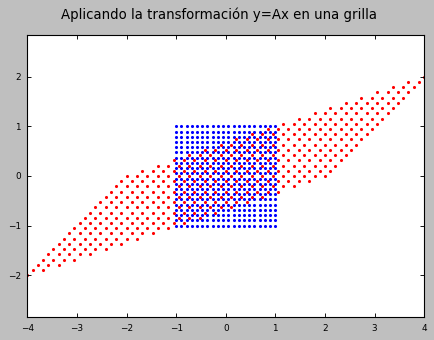

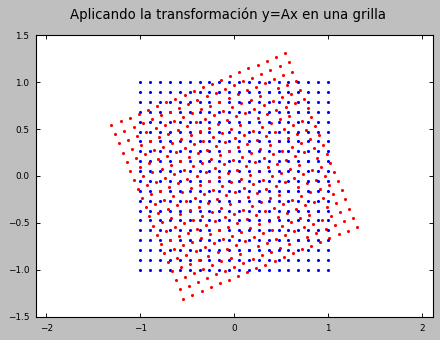

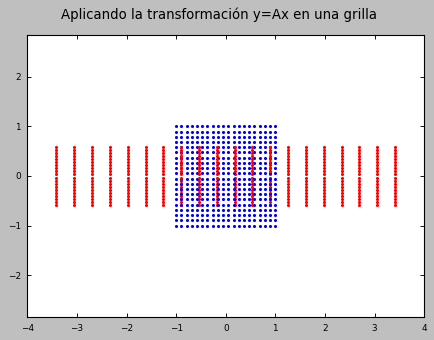

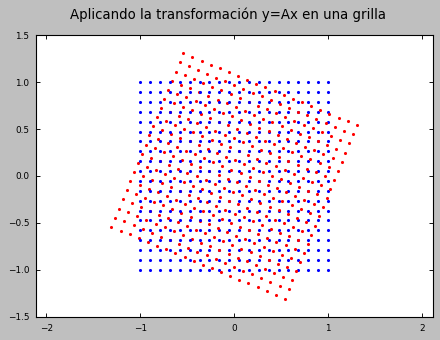

In [114]:
Ex=np.array([3,1,1,1]).reshape(2,2)
# Find eigenvectors
U=np.linalg.eig(Ex)[1]
lmbda1= np.diag(np.linalg.eigvals(Ex))

transform_unit_square(Ex)
transform_unit_square(U)
transform_unit_square(lmbda1)
transform_unit_square(np.transpose(U))

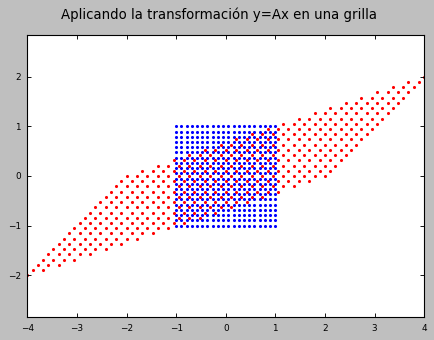

In [127]:
transform_unit_square(U@lmbda1@np.linalg.inv(U))

Tomando el inverso y dado que $U^{-1} = U^T$ (porque U es ortogonal), tenemos: 

$A^{-1} = U \Lambda^{-1} U^T$, or 

$A^{-1} = \sum_{i=1}^M \frac{1}{\lambda_i} u_i u_i^T$ **[10]**

In [128]:
# Calculate the inverse of A
print (ev@np.linalg.inv(lmbda)@np.transpose(ev))

print (np.linalg.inv(A))


[[ 0.5         0.          0.        ]
 [ 0.          0.81818182 -0.36363636]
 [ 0.         -0.36363636  0.27272727]]
[[ 0.5         0.          0.        ]
 [ 0.          0.81818182 -0.36363636]
 [-0.         -0.36363636  0.27272727]]


Podemos también ver que **el determinante de una matriz es el producto de sus valores propios**:

$|A| = \prod_{i=1}^{M}\lambda_i$ **[11]**

Y que **la traza de una matriz es la suma de sus valores propios**

$Tr(A) = \sum_{i=1}^{M}\lambda_i$ **[12]**



In [116]:
print (str(np.prod(np.linalg.eigvals(A))) + ','+ str(np.linalg.det(A)))

print (str(np.sum(np.linalg.eigvals(A))) + ','+ str(np.trace(A)))

22.0,21.999999999999996
14.0,14


Una matriz simétrica A es _positiva (semi)definida_ si, para todo w, $w^T A w >(\geq) 0$ ($w^T A w $ es llamada _forma cuadrática_). Una función positiva definida tiene todos sus valores propios positivos. La intuición detrás de las matrices definidas positivas es que son veriones multidimensionales de los escalares positivos. Cuando multiplicas un vector por una matriz, multiplicas el vector por diferentes factores en diferentes direcciones. Si una matriz es positiva definida, esto se cumple, pero el vector original y el resultante van "en la misma dirección", ya que su ángulo es menor a 90 grados (tienen un producto interno positivo). Referencia: [Quora](https://www.quora.com/What-is-a-positive-definite-matrix-in-laymans-terms).

Una propiedad muy importante de las matrices positivas definidas y negativas definidas es que son siempre de rango completo, y, por lo tanto, invertibles. 

Dada $A \in {\rm I\!R}^{n \times n}$ ,existe una matriz especial $G =A^TA$, llamada _Matrix Gram_, siempre positiva semidefinida, y si  $m \geq n$, $G$ es positiva definida. 



## 9. Cálculo de matrices

Dada una función  $f$ que mapea matrices  $m$-by-$n$ a números reales, podemos definir el  _gradiente_ $\nabla_A f(A)$ como una matriz $m$-by-$n$ cuyo elemento  $(i,j)$ es $\partial f/\partial A_{ij}$. Algunas propiedades de los gradientes (véase el apéndice del libro de Bishop para los detalles), son los siguientes:

- $\nabla_{A}Tr(AB)=B^T$ **[11]**
- $\nabla_{A}Tr(A^TB)=B$ **[12]**
- $\nabla_{A}Tr(A)=I$ **[13]**
- $ \nabla_{A}Tr(ABA^T)=A(B+B^T)$**[14]**

Y el precioso:

- $\nabla_{A}\ln|A|=(A^{-1})^T$**[15]**

Dos propiedades más, tomadas de las notas del curso de Andrew Ng:

- $\nabla_{A^T} f(A)= (\nabla_{A} f(A))^T$ **[16]**
- $\nabla_{A} Tr(ABA^TC) = CAB + C^TAB^T$ **[17]**

## 10. Matrices para Aprendizaje Automático

Es difícil encontrar un método de aprendizaje automático que no utilice matrices. Desde la regresión lineal hasta las redes neuronales profundas, pasando por el Análisis de Componentes Principales, las cosas son mucho más fáciles si utilizamos matrices y vectores. Solo como ejemplo, mostremos cómo encontrar una solución de forma cerrada para el problema de regresión lineal, siguiendo exactamente las  [notas](http://cs229.stanford.edu/notes/cs229-notes1.pdf) de Andew Ng. En la siguiente sección, veremos cómo implementar todo usando Python.

Primero, definamos el problema de la regresión lineal: tenemos una serie de características de entrada de $\mathbb{R}^n$, denotadas como $x$, y un valor objetivo asociado $y$ en $\mathbb{R}$. Nuestra hipótesis es que, dado $x$, $h(x) = \sum_{i=0}^{i=n} \theta_i x_i$ (asumiendo que $x_0=1$), o, usando notación matricialobserveva cuánto más fácil se ve)s):

$h(x)=\theta^T x$




(Note que, por convención, una instancia de $\mathbb{R}^n$ se considera un vector columna). Lo que queremos hacer es encontrar $\theta^T$, dado un conjunto de entrenamiento (es decir, instancias de $\mathbb{R}^n$ y sus valores objetivo asociados). La función de coste que queremos minimizar con respecto a $\theta$ es la siguiente:

$J(\theta) = \frac{1}{2}\sum_{i=1}^{i=m} (h_\theta(x^{(i)})- y^{(i)})^2$

donde $x^{(i)}$ denota la i-ésima instancia , y $y^{(i)}$ su valor. Este método es llamado _de mínimos cuadrados_.


Una forma típica de minimizar $J$ es utilizando algún método numérico, por ejemplo, descenso por gradiente, que permite minimizar cualquier función convexa de múltiples variables. Sin embargo, para los mínimos cuadrados, existe una solución de forma cerrada, que mostraremos. El uso de notación matricial hará las cosas mucho más fáciles que si tuviéramos que usar notación indexada.

Primero, reescribamos $J$ usando notación matricial:

$J(\theta) = \frac{1}{2}(X\theta - y)^T(X\theta - y)$

donde $X$ es la matriz de diseño que incluye los valores de entrada de las instancias de entrenamiento como filas, y $y$ es una matriz columna que incluye los valores objetivo correspondiepuede intentarpuedes usar notación indexada para verificar la equivalencia, teniendo en cuenta que $zz^T$ es igual a la suma de los elementos al cuadrado e $z$!).


A partir de aquí, las cosas son fáciles (especialmente si se comparan a las versiones con índices...). Primero, usamos [1]:

$$
\nabla_\theta J(\theta) =\nabla_\theta\frac{1}{2}(X\theta - y)^T(X\theta - y) = \nabla_\theta\frac{1}{2} (\theta^TX^TX\theta - \theta^TX^Ty - y^TX\theta+ yy^T) 
$$


Como $J(\theta)$ es un número real su traza es el propio número

$$
\nabla_\theta J(\theta) =\nabla_\theta\mathrm{Tr}(\frac{1}{2} (\theta^TX^TX\theta - \theta^TX^Ty - y^TX\theta+ yy^T))
$$




Como $\mathrm{Tr}(A) = \mathrm{Tr}(A^T)$:

$$
\nabla_\theta J(\theta) = \frac{1}{2} \nabla_\theta(\mathrm{Tr}(\theta^TX^TX\theta) - 2 \mathrm{Tr}(\theta^TX^Ty) + \mathrm{Tr}(yy^T))
$$

Aplicando [16] y [17] obtenemos:

$$
\nabla_\theta J(\theta) = \frac{1}{2} (X^TX\theta + X^TX\theta -2X^Ty )= X^TX\theta -X^Ty
$$

Para minimizar $J$, igualamos el gradiente a 0, y obtenemos

$$
X^TX\theta = X^Ty
$$

y con esto obtenemos una fórmula cerrada para nuestro vector de parámetros  $\theta$:

$$
\theta = (X^TX)^{-1}X^Ty
$$

## 11. Regresion lineal con Python

Supongamos que tenemos una clase objetivo _y_ (por ejemplo, el precio de una casa), que depende de 3 atributos de valor real $x_1, x_2, x_3$ (digamos, número de habitaciones, impuesto mínimo y antigüedad de la casa). Supongamos que tenemos los atributos y precios de 10 casas. _Si asumimos que el precio de una casa es una combinación lineal de los tres atributos_, $y = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3$, y que debemos encontrar los valores de $\theta$. Podemos definir $X$ (la matriz de diseño) y $y$ de la siguiente manera:

Matriz de diseño $X$:
Esta matriz tendrá 10 filas (una por cada casa) y 4 columnas. La primera columna será siempre $1$ (correspondiente al término de intercepción $\theta_0$), seguida de los valores de los tres atributos para cada casa.

In [117]:
X=np.array([
[1.0,1.0,1.9,1.1],
[1.0,0.1,1.0,1.0],
[1.0,1.1,1.0,0.1],
[1.0,1.1,1.1,0.9],
[1.0,2.1,1.2,1.0],
[1.0,0.9,1.0,3.0],
[1.0,3.1,0.9,3.0],
[1.0,1.9,0.9,2.1],
[1.0,0.0,-0.1,1.1],
[1.0,1.0,1.0,0.1]
])
print (X)


[[ 1.   1.   1.9  1.1]
 [ 1.   0.1  1.   1. ]
 [ 1.   1.1  1.   0.1]
 [ 1.   1.1  1.1  0.9]
 [ 1.   2.1  1.2  1. ]
 [ 1.   0.9  1.   3. ]
 [ 1.   3.1  0.9  3. ]
 [ 1.   1.9  0.9  2.1]
 [ 1.   0.  -0.1  1.1]
 [ 1.   1.   1.   0.1]]


In [118]:
y=np.array([5.0,2.0,4.1,3.0,5.0,1.0,2.8,2.6,-0.4,4.1])
print (y)


[ 5.   2.   4.1  3.   5.   1.   2.8  2.6 -0.4  4.1]


Observe que agregamos una columna a la izquierda de la matriz, con todas sus celdas en 1. Esto es para agregar un nuevo atributo $x_0$ attribute, como hicimos antes. Podemos ahora calcular los parámetros para el hiperplano que minimiza la suma de los cuadrados utilizando la fórmula previa ($\theta = (X^TX)^{-1}X^Ty$):

In [122]:
theta = (np.linalg.inv(np.transpose(X)@X)@np.transpose(X)@y)
print(theta)

[ 0.87782702  1.051817    2.18366554 -1.05476926]


Verifiquemos que el vector de parámetros que encontramos multiplicado por los atributos de cada instancia nos da valores aproximados a la celda $y$ correspondiente. Podemos hacerlo para todos los ejemplos, calculando $X\theta$

In [123]:
print (X@theta)


[ 4.91836235  2.111905    4.11301432  3.48756547  4.6522721   0.84382008
  2.93945092  2.62656285 -0.50078572  4.00783262]


Por supuesto, a) el de mínimos cuadrados es un método muy simple de regresión y b) cualquier paquete de aprendizaje automático o estadística incluye formas mucho más eficiente de encontrar $\theta$. Por ejemplo, utilizando la biblioteca `linalg`:

In [125]:
print (np.linalg.lstsq(X, y,rcond=None)[0])

[ 0.87782702  1.051817    2.18366554 -1.05476926]
